# Credit Card Fraud Detection for Highly Imbalanced Data
___

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
# Read and view the file

data = pd.read_csv('creditcard.csv')

data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### EDA and Feature Engineering 
Most of the EDA and Feature Engineering work has been already done by the dataset provider.

1. Read and view the data file.
2. Make sure that all features are numeric and null values are removed completely.
3. View and plot the class count.

In [3]:
# check the file size

data.shape

(284807, 31)

In [4]:
# Check for null values

data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
# check the data types of all features

# Make sure that all features are numeric and null values are removed completely.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Check for imbalance class

data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<IPython.core.display.Javascript object>


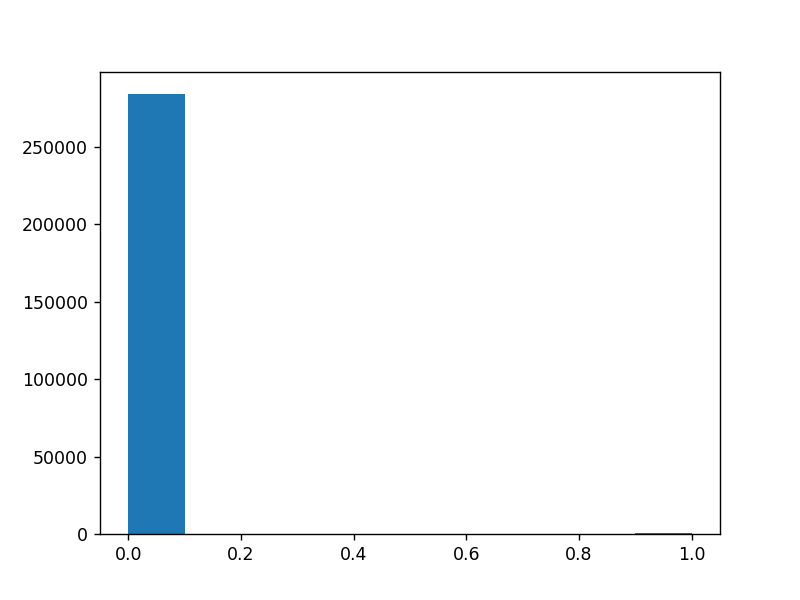

In [7]:
# Plot imbalanced class data

plt.figure()
plt.hist(data['Class'])
plt.show()

In [8]:
# saperating features and predicting value
# x contains our all featurs
# y contains output which needs to be predicted
# In Class or y, 0=non_fraud and 1=fraud

x = data.drop('Class', axis=1)
y = data['Class']

# spliting data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [9]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Gradient Boosting Classifier

In this **highly imbalanced data**, we should not **miss** any **fraudulent transaction** and hence we must achieve **high Recall.**

### Model fitting using Gradient Boosting Classifier

1. Split the dataset into train and test sets.
2. Gradient Boosting does not require any feature scaling.
3. Import and fit the model.
4. Predict for test data.
5. Evaluate Recall, Precision and F1 Score between y_test and y_pred.
6. Plot the Confusion Matrix for y_test and y_pred.
7. Plot the Precision-Recall curve for y_test and y_pred.
8. Plot the ROC curve for y_test and y_pred.
9. Calculate the AUC between y_test and y_pred.
10. Check for Recall as best performance parameter.

In [10]:
# Gradient Boosting Classifier

gbc = GradientBoostingClassifier()

gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [11]:
# Prediction on test data

y_pred_gbc = gbc.predict(x_test)

# Calculate precision_score, recall_score, f1_score

from sklearn.metrics import precision_score, recall_score, f1_score

print('F1 Score for Gradient Boosting Classifier : {:.2f}'.format(f1_score(y_test, y_pred_gbc)))
print('Precision for Gradient Boosting Classifier: {:.2f}'.format(precision_score(y_test, y_pred_gbc)))
print('Recall for Gradient Boosting Classifier: {:.2f}'.format(recall_score(y_test, y_pred_gbc)))

F1 Score for Gradient Boosting Classifier : 0.71
Precision for Gradient Boosting Classifier: 0.80
Recall for Gradient Boosting Classifier: 0.64


<IPython.core.display.Javascript object>


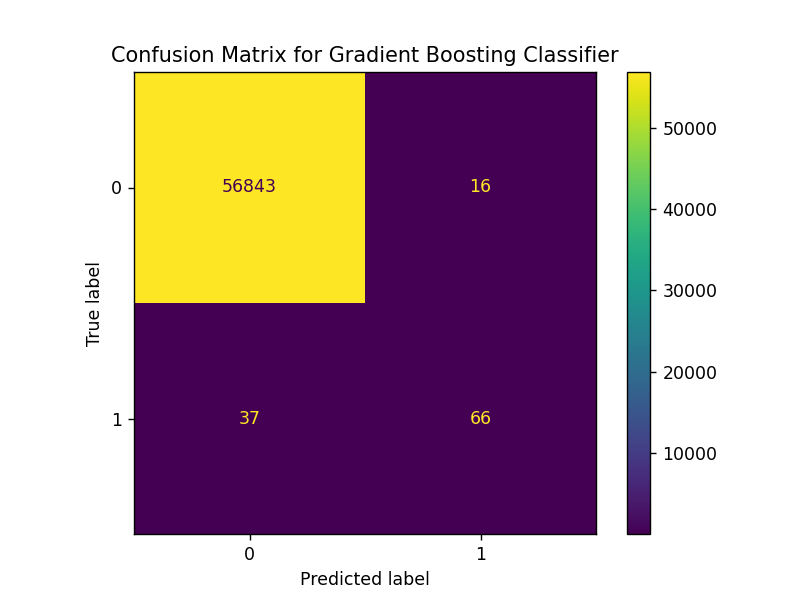

In [12]:
# Calculate the confusion matrix

cm_gbc = confusion_matrix(y_test, y_pred_gbc, labels=gbc.classes_)

# Plot the confusion matrix using ConfusionMatrixDisplay()

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_gbc, display_labels=gbc.classes_)
cm_display.plot()
plt.title("Confusion Matrix for Gradient Boosting Classifier")
plt.savefig('cm1.png')
plt.show()

<IPython.core.display.Javascript object>


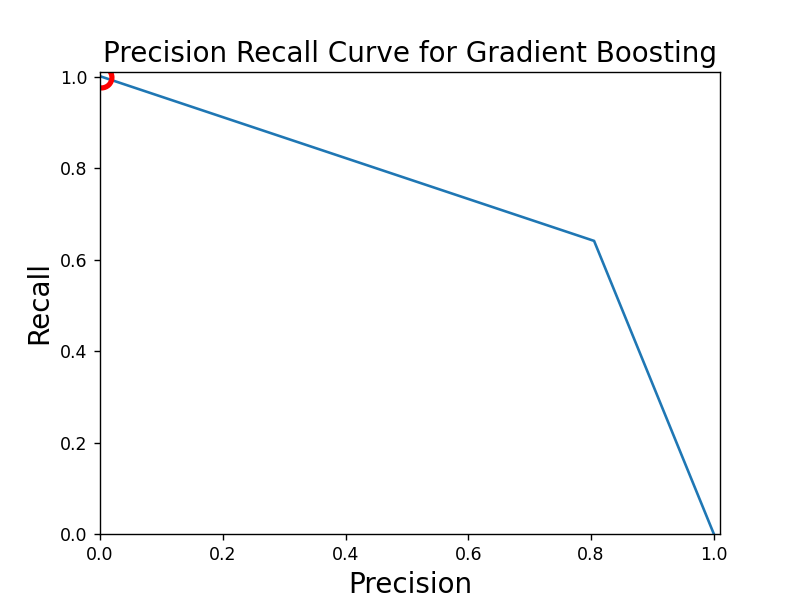

In [13]:
# Precision Recall Curve

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_gbc)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.title('Precision Recall Curve for Gradient Boosting', fontsize=16)
plt.savefig('PR_curve1.png')
#plt.axes().set_aspect('equal')
plt.show()


<IPython.core.display.Javascript object>


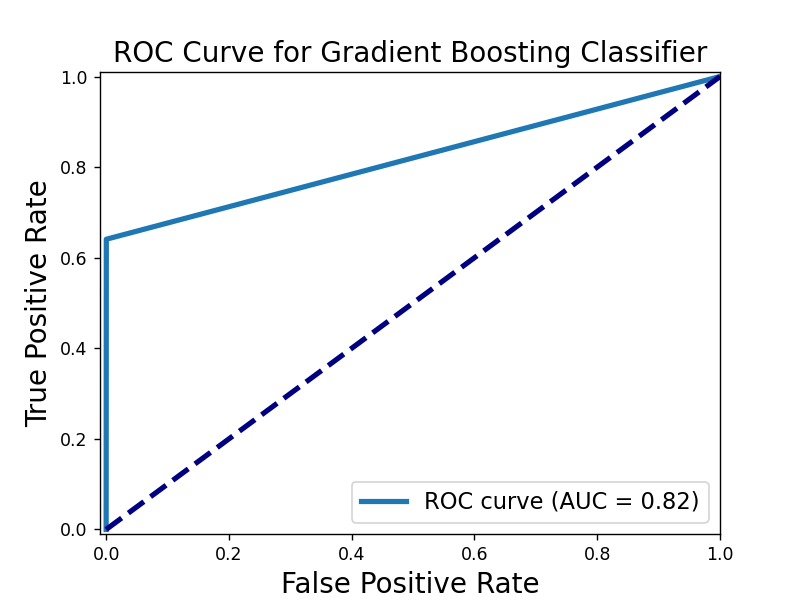

In [14]:
# ROC curve and AUC

from sklearn.metrics import roc_curve, auc

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_gbc)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='ROC curve (AUC = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curve for Gradient Boosting Classifier', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.savefig('ROC_curve1.png')
#plt.axes().set_aspect('equal')
plt.show()

## Random Forest Classifier

In this **highly imbalanced data**, we should not **miss** any **fraudulent transaction** and hence we must achieve **high Recall.**

### Model fitting using Random Forest Classifier

1. Split the dataset into train and test sets.
2. Random Forest does not require any feature scaling.
3. Import and fit the model.
4. Predict for test data.
5. Evaluate Recall, Precision and F1 Score between y_test and y_pred.
6. Plot the Confusion Matrix for y_test and y_pred.
7. Plot the Precision-Recall curve for y_test and y_pred.
8. Plot the ROC curve for y_test and y_pred.
9. Calculate the AUC between y_test and y_pred.
10. Check for Recall as best performance parameter.

In [15]:
# Random Forest Classifier

rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

RandomForestClassifier()

In [16]:
# Prediction on test data

y_pred_rfc = rfc.predict(x_test)

# Calculate precision_score, recall_score, f1_score

from sklearn.metrics import precision_score, recall_score, f1_score

print('F1 Score for Random Forest Classifier: {:.2f}'.format(f1_score(y_test, y_pred_rfc)))
print('Precision for Random Forest Classifier: {:.2f}'.format(precision_score(y_test, y_pred_rfc)))
print('Recall for Random Forest Classifier: {:.2f}'.format(recall_score(y_test, y_pred_rfc)))

F1 Score for Random Forest Classifier: 0.81
Precision for Random Forest Classifier: 0.95
Recall for Random Forest Classifier: 0.71


<IPython.core.display.Javascript object>


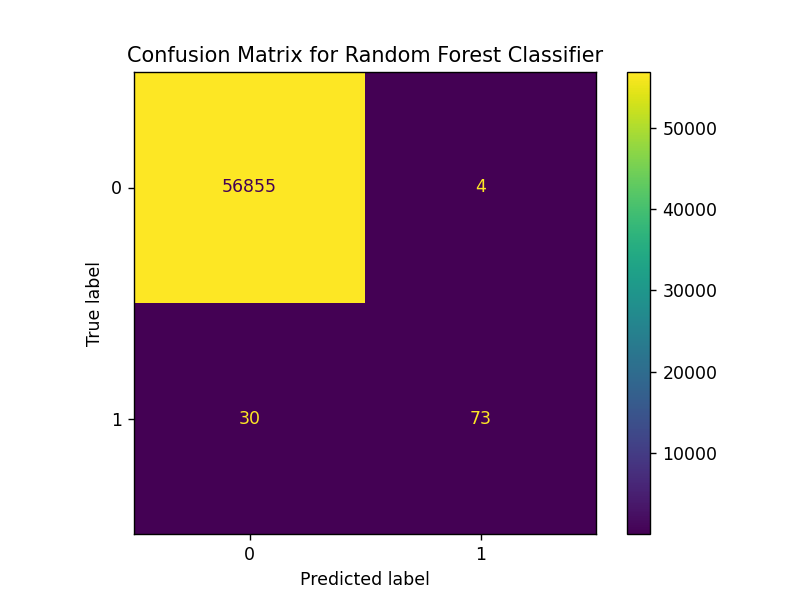

In [17]:
# Calculate the confusion matrix

cm_rfc = confusion_matrix(y_test, y_pred_rfc, labels=rfc.classes_)

# Plot the confusion matrix using ConfusionMatrixDisplay()

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_rfc, display_labels=rfc.classes_)
cm_display.plot()
plt.title("Confusion Matrix for Random Forest Classifier")
plt.savefig('cm2.png')
plt.show()

<IPython.core.display.Javascript object>


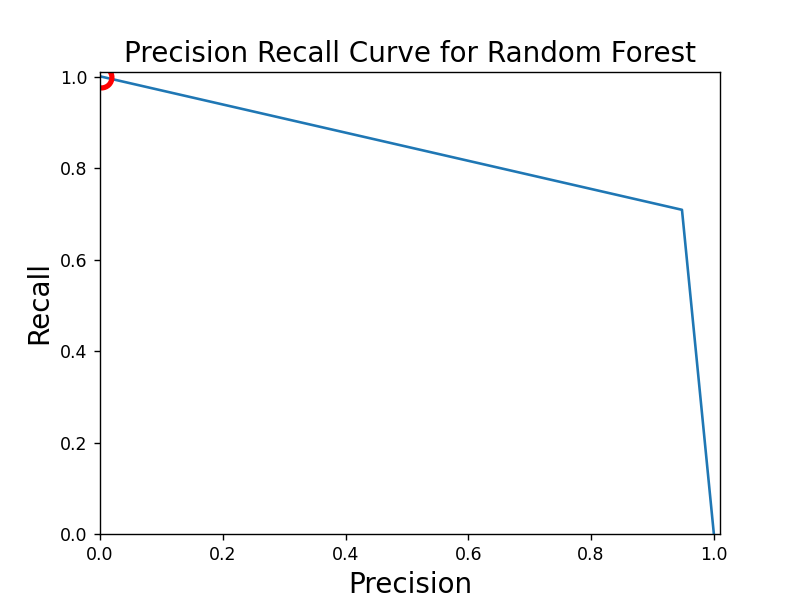

In [18]:
# Precision Recall Curve

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rfc)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.title('Precision Recall Curve for Random Forest', fontsize=16)
plt.savefig('PR_curve2.png')
#plt.axes().set_aspect('equal')
plt.show()


<IPython.core.display.Javascript object>


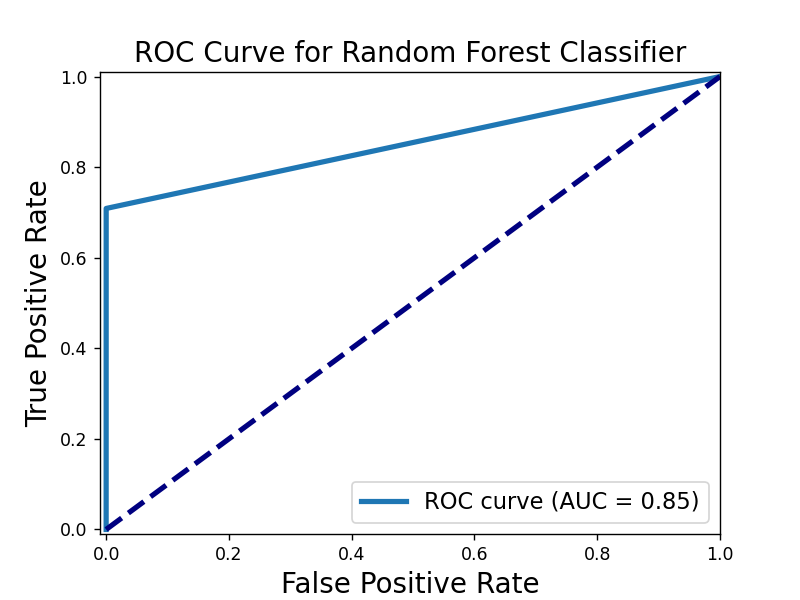

In [19]:
# ROC curve and AUC

from sklearn.metrics import roc_curve, auc

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_rfc)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='ROC curve (AUC = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curve for Random Forest Classifier', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.savefig('ROC_curve2.png')
#plt.axes().set_aspect('equal')
plt.show()

## XGBoost Classifier

In this **highly imbalanced data**, we should not **miss** any **fraudulent transaction** and hence we must achieve **high Recall.**

### Model fitting using XGBoost Classifier

1. Split the dataset into train and test sets.
2. XGBoost does not require any feature scaling.
3. Import and fit the model.
4. Predict for test data.
5. Evaluate Recall, Precision and F1 Score between y_test and y_pred.
6. Plot the Confusion Matrix for y_test and y_pred.
7. Plot the Precision-Recall curve for y_test and y_pred.
8. Plot the ROC curve for y_test and y_pred.
9. Calculate the AUC between y_test and y_pred.
10. Check for Recall as best performance parameter.

In [20]:
# XGBoost Classifier

xgb = XGBClassifier()

xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [21]:
# Prediction on test data

y_pred_xgb = xgb.predict(x_test)

# Calculate precision_score, recall_score, f1_score

from sklearn.metrics import precision_score, recall_score, f1_score

print('F1 Score for XGBoost Classifier: {:.2f}'.format(f1_score(y_test, y_pred_xgb)))
print('Precision for XGBoost Classifier: {:.2f}'.format(precision_score(y_test, y_pred_xgb)))
print('Recall for XGBoost Classifier: {:.2f}'.format(recall_score(y_test, y_pred_xgb)))

F1 Score for XGBoost Classifier: 0.83
Precision for XGBoost Classifier: 0.94
Recall for XGBoost Classifier: 0.75


<IPython.core.display.Javascript object>


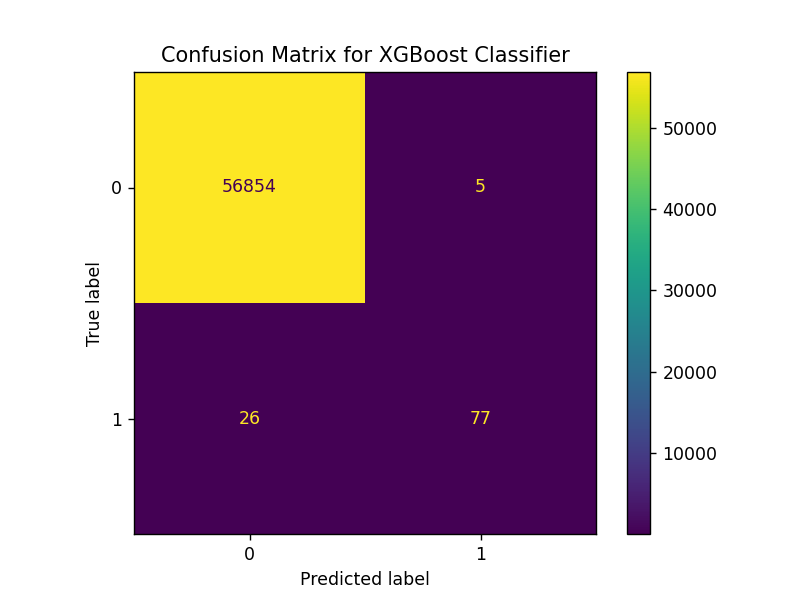

In [22]:
# Calculate the confusion matrix

cm_xgb = confusion_matrix(y_test, y_pred_xgb, labels=xgb.classes_)

# Plot the confusion matrix using ConfusionMatrixDisplay()

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_xgb, display_labels=xgb.classes_)
cm_display.plot()
plt.title("Confusion Matrix for XGBoost Classifier")
plt.savefig('cm3.png')
plt.show()

<IPython.core.display.Javascript object>


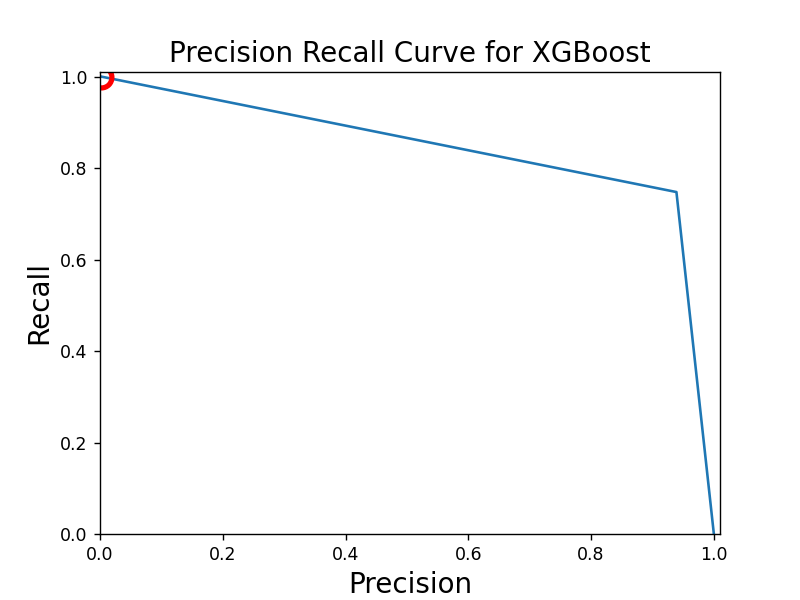

In [23]:
# Precision Recall Curve

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_xgb)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.title('Precision Recall Curve for XGBoost', fontsize=16)
plt.savefig('PR_curve3.png')
#plt.axes().set_aspect('equal')
plt.show()


<IPython.core.display.Javascript object>


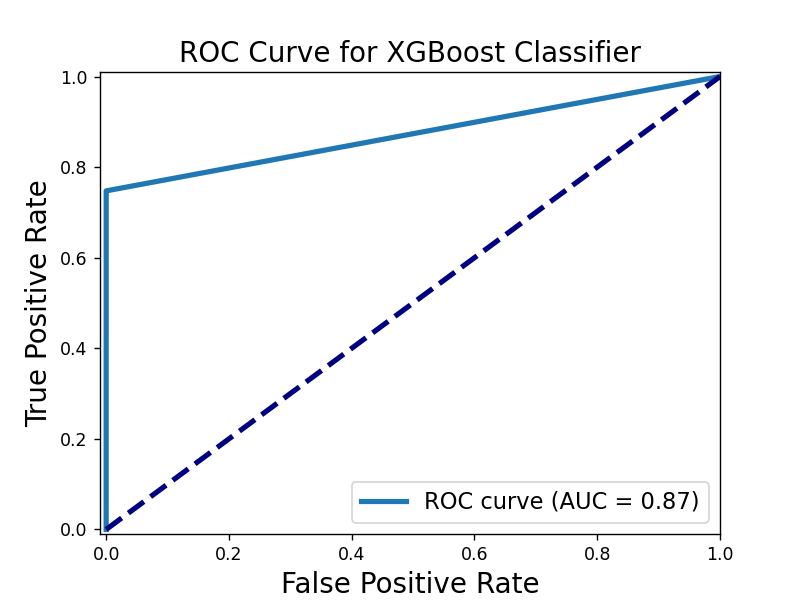

In [24]:
# ROC curve and AUC

from sklearn.metrics import roc_curve, auc

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_xgb)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='ROC curve (AUC = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curve for XGBoost Classifier', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.savefig('ROC_curve3.png')
#plt.axes().set_aspect('equal')
plt.show()